***Text Summerization : Classical and Transformer Based Appraches***

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the data directories
train_data = pd.read_csv('/content/drive/Othercomputers/My Mac/DS-Project/text_summarization_project/data/data_raw/data_train/cnn_train_data.csv')
test_data = pd.read_csv('/content/drive/Othercomputers/My Mac/DS-Project/text_summarization_project/data/data_raw/data_test/cnn_test_data.csv')
val_data = pd.read_csv('/content/drive/Othercomputers/My Mac/DS-Project/text_summarization_project/data/data_raw/data_validation/cnn_validation_data.csv')

#### **Exploratory Data Analysis**

In [ ]:
train_data.describe()
train_data.head(5)

,Unnamed: 0,article,highlights,id
0,0,By . Daily Mail Reporter . PUBLISHED: . 04:03 ...,Lackland Air Force Base instructor Christopher...,aaa6237fb3dabcc34f95ad010c15d90a55c769c4
1,1,"By . Martin Robinson . PUBLISHED: . 10:45 EST,...",Leanne Zaloumis was found by the music mogul s...,57fc39ad6aadaf215f7bbedf3f5947d93a3dec60
2,2,"By . Luke Salkeld . UPDATED: . 07:48 EST, 16 N...",One was posted from Paris - three days after G...,0fd3a209c873fb5229ea4d752f486645002c03f9
3,3,"By . Helen Collis . PUBLISHED: . 13:47 EST, 3 ...",Alex Shirra was unconscious for 12 days after ...,c53e85eca2140700b5c3a522ac34eddceeda73b4
4,4,"By . David Baker . PUBLISHED: . 13:54 EST, 2 A...",Firebombing comes after man stormed reception ...,4324f10606dca366e937dfcb1453c6a9d5364151


In [ ]:
test_data.describe()

,Unnamed: 0
count,11490.000000
mean,5744.500000
std,3317.021631
min,0.000000
25%,2872.250000
50%,5744.500000
75%,8616.750000
max,11489.000000


In [ ]:
val_data.describe()

,Unnamed: 0
count,13368.000000
mean,6683.500000
std,3859.153534
min,0.000000
25%,3341.750000
50%,6683.500000
75%,10025.250000
max,13367.000000


In [ ]:
# missing values
missing_values = train_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Unnamed: 0    0
article       0
highlights    0
id            0
dtype: int64


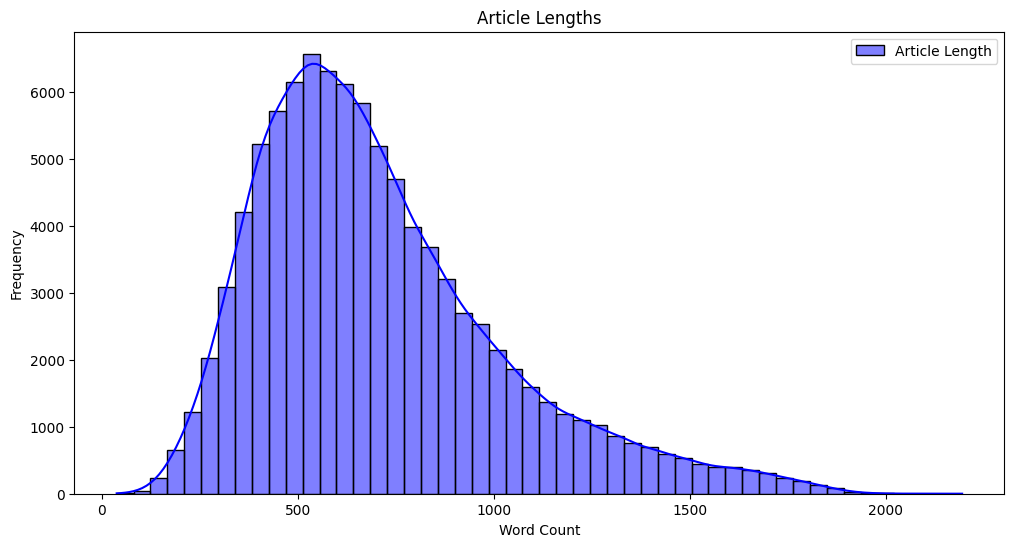

In [ ]:
# length of each article and highlights
train_data['article_length'] = train_data['article'].apply(lambda x: len(x.split()))
# Plot distribution of article length
plt.figure(figsize=(12,6))
sns.histplot(train_data['article_length'], bins=50, kde=True, color='blue', label='Article Length')
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.title("Article Lengths")
plt.show()

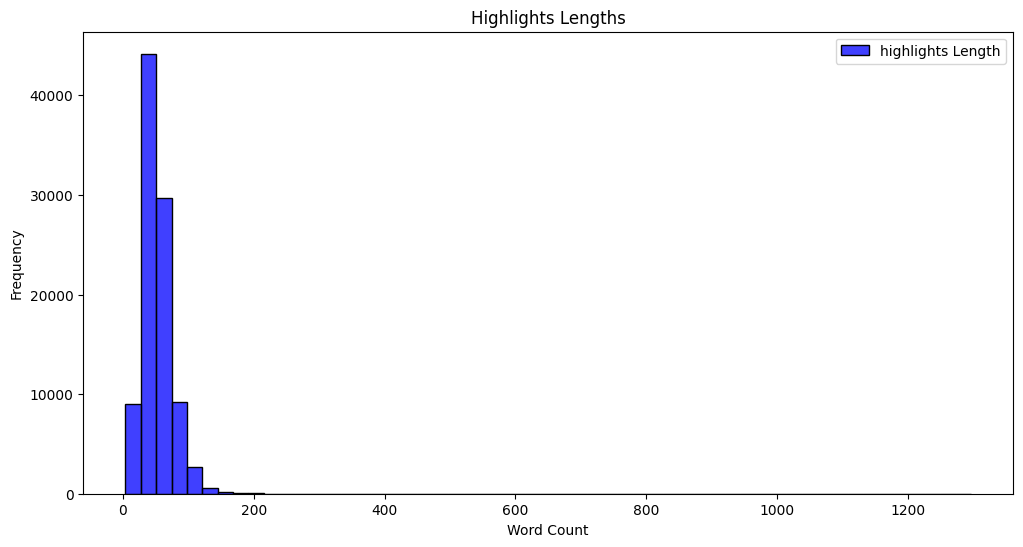

In [ ]:
train_data['highlights_length'] = train_data['highlights'].apply(lambda x: len(x.split()))

# Highlights length
plt.figure(figsize=(12,6))
sns.histplot(train_data['highlights_length'], bins=55, color='blue',  label='highlights Length')
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.title("Highlights Lengths")
max_word_count = train_data['highlights_length'].max()
plt.xticks(np.arange(0, max_word_count + 1, 200))
plt.show()

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# def plot_wordcloud(text, title):
#     wordcloud = WordCloud(width=800, height=400, stopwords=stop_words, background_color="white").generate(" ".join(text))
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.title(title)
#     plt.show()

# # Plot word clouds
# plot_wordcloud(train_data['article'], 'Word Cloud for Articles')
# plot_wordcloud(train_data['highlights'], 'Word Cloud for Summaries')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### **Data Preprocessing**

In [4]:
csv_path ='/content/drive/Othercomputers/My Mac/DS-Project/text_summarization_project/data/data_raw/data_test/cnn_test_data.csv'

# load dataset
def load_cnn_daily_mail_dataset(csv_path):
    # Load data from CSV
    df = pd.read_csv(csv_path)

    # random  20 rows
    sample_df = df.sample(n=20, random_state=42)

    # Convert sample to a list of dictionaries with 'article' and 'highlights'
    data = sample_df[['article', 'highlights']].to_dict(orient='records')

    return data

In [5]:
data_samples = load_cnn_daily_mail_dataset(csv_path)
data_samples[0]['article']

"Down Augusta way they say the azaleas are in full bloom, which is more than can be said for England’s Justin Rose. A bruising Florida swing last month saw the Englishman fall outside the world’s top 10. For a player who has been virtually a fixture in the top five for the last three years it was certainly a dent to the ego, with the Masters now just around the corner. Rose’s solution to his miserable form — three missed cuts and a 55th-place finish at the Cadillac Championship in four PGA Tour starts — was the time-honoured one. For the past two weeks, the 34-year-old has spent long hours on the practice ground. Justin Rose hit 17 out of 18 greens in regulation and signed for a 69 at the\xa0Shell Houston Open . In the first round of the Shell Houston Open on Thursday there were encouraging signs his decline will prove temporary. Rose hit 17 out of 18 greens in regulation and signed for a 69, the same score as his playing partner, the ever- consistent Jordan Spieth. ‘It’s certainly a w

In [15]:
# Download NLTK stopwords
nltk.download("stopwords")
nltk.download('punkt_tab')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [16]:
# Text Preprocessing
def preprocess_text(text):

    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    # Removing stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

####  **Bag of Words**

In [17]:
# Bag of Words Summarization
def summarize_with_bow(article_text, num_sentences=5):
    # Split article into sentences
    sentences = nltk.sent_tokenize(article_text)
    # Preprocess sentences
    processed_sentences = [preprocess_text(sentence) for sentence in sentences]

    # Vectorize sentences using Bag of Words
    vectorizer = CountVectorizer()
    sentence_vectors = vectorizer.fit_transform(processed_sentences)

    # Compute similarity matrix
    similarity_matrix = cosine_similarity(sentence_vectors)

    # similarity score
    sentence_scores = similarity_matrix.sum(axis=1)
    ranked_sentences = np.argsort(sentence_scores)[::-1]

    # Select top sentences
    selected_sentences = [sentences[i] for i in ranked_sentences[:num_sentences]]
    summary = " ".join(selected_sentences)
    return summary

# Load dataset
data = load_cnn_daily_mail_dataset(csv_path)
example_article = data[1]["article"]

# Generate summary for an example article
summary = summarize_with_bow(example_article)
# print("Original Article:", example_article)
print("Generated Summary:", summary)

Generated Summary: Jockey Lewis Ferguson, 18, who survived a spectacular fall from Merrion Square shows off the cut on his nose . Ferguson, whose double somersault horror fall from the favourite Merrion Square in the 4.20pm at Wincanton on Wednesday has been watched hundreds of thousands of times online. Ferguson, whose double somersault horror fall has been watched by hundreds of thousands online . Ferguson escaped the fall and the only real pain was the cut on his nose and the banter from his friends . The 18-year-old was mucking out the stables as usual, just a cut on the nose to show for the fall which has made him an internet sensation.


#### **TF - IDF**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#  TF-IDF
def summarize_with_tfidf(article_text, num_sentences=5):
    # Split article into sentences
    sentences = nltk.sent_tokenize(article_text)
    # Preprocess sentences
    processed_sentences = [preprocess_text(sentence) for sentence in sentences]

    # Vectorize sentences using TF-IDF
    vectorizer = TfidfVectorizer()
    sentence_vectors = vectorizer.fit_transform(processed_sentences)

    # similarity matrix
    similarity_matrix = cosine_similarity(sentence_vectors)

    # Rank sentences by similarity scores
    sentence_scores = similarity_matrix.sum(axis=1)
    ranked_sentences = np.argsort(sentence_scores)[::-1]

    # Select top sentences
    selected_sentences = [sentences[i] for i in ranked_sentences[:num_sentences]]
    summary = " ".join(selected_sentences)
    return summary

# Generate summary
example_article = data_samples[1]["article"]
summary = summarize_with_tfidf(example_article)
# print("Original Article:", example_article)
print("Generated Summary:", summary)

Generated Summary: Ferguson, whose double somersault horror fall from the favourite Merrion Square in the 4.20pm at Wincanton on Wednesday has been watched hundreds of thousands of times online. Jockey Lewis Ferguson, 18, who survived a spectacular fall from Merrion Square shows off the cut on his nose . Ferguson, whose double somersault horror fall has been watched by hundreds of thousands online . There was no special treatment for Lewis Ferguson at Paul Nicholls’ yard on Thursday morning. The 18-year-old was mucking out the stables as usual, just a cut on the nose to show for the fall which has made him an internet sensation.


#### **T5 (Text-to-Text Transfer Transformer)**

In [21]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
import evaluate
import numpy as np

In [22]:
cnn_dailymail = load_dataset("cnn_dailymail", "1.0.0")
sampled_dataset = cnn_dailymail["train"].select(range(50000))
cnn_dailymail = sampled_dataset.train_test_split(test_size=0.2)
checkpoint = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/256M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [23]:
def preprocess_function(examples):
    inputs = ["summarize: " + doc for doc in examples["article"]]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True)
    labels = tokenizer(text_target=examples["highlights"], max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


In [24]:
tokenized_cnn_dailymail = cnn_dailymail.map(preprocess_function, batched=True)

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [25]:
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=checkpoint)
rouge = evaluate.load("rouge")
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [26]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    print("Sample Predictions:", decoded_preds[:3])  # Log some predictions
    return {k: round(v, 4) for k, v in result.items()}

In [27]:
training_args = Seq2SeqTrainingArguments(
    output_dir="/content/drive/Othercomputers/My Mac/DS-Project/text_summarization_project/models",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=18,
    per_device_eval_batch_size=18,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=1,
    predict_with_generate=True,
    fp16=True,

)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [28]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_cnn_dailymail["train"],
    eval_dataset=tokenized_cnn_dailymail["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,

)
trainer.train()

<ipython-input-28-0ee4425b9e00>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


KeyboardInterrupt: 

In [29]:
model_name = "/content/drive/Othercomputers/My Mac/DS-Project/text_summarization_project/models/checkpoint-2000"  # Replace with your checkpoint's model path
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [30]:
def summerize_with_T5(article_text):
    inputs = tokenizer(article_text, return_tensors="pt", max_length=1024, truncation=True)

    outputs = model.generate(
          **inputs,
          max_length=512,
          early_stopping=True,
          temperature=0.8,
          top_k=70,
          top_p=0.8,
          num_beams=4,
      )

    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

#### **BERT - Bidirectional Encoder Representations From Transformers**

In [31]:
%%capture
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
tokenizer = AutoTokenizer.from_pretrained("patrickvonplaten/bert2bert_cnn_daily_mail")
model = AutoModelForSeq2SeqLM.from_pretrained("patrickvonplaten/bert2bert_cnn_daily_mail")

Config of the encoder: <class 'transformers.models.bert.modeling_bert.BertModel'> is overwritten by shared encoder config: BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "return_dict": false,
  "transformers_version": "4.46.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

Config of the decoder: <class 'transformers.models.bert.modeling_bert.BertLMHeadModel'> is overwritten by shared decoder config: BertConfig {
  "_name_or_path": "bert-base-uncased",
  "add_cross_attention"

In [32]:
import datasets
test_data = datasets.load_dataset("cnn_dailymail", "1.0.0", split="test[:2%]")

In [33]:
from transformers import EncoderDecoderModel
bert2bert = EncoderDecoderModel.from_encoder_decoder_pretrained("bert-base-uncased", "bert-base-uncased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertLMHeadModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['bert.encoder.layer.0.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.0.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.0.crossattention.output.dense.bias', 'bert.encoder.layer.0.crossattention.output.dense.weight', 'bert.encoder.layer.0.crossattention.self.key.bias', 'bert.encoder.layer.0.crossattention.self.key.weight', 'bert.encoder.layer.0.crossattention.self.query.bias', 'bert.encoder.layer.0.crossattention.self.query.weight', 'bert.encoder.layer.0.crossattention.self.value.bias', 'bert.encoder.layer.0.crossattention.self.value.weight', 'bert.encoder.layer.1.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.1.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.1.crossattention.output.dense.bias', 'bert.encoder.layer.1.crossattention.output.dense.weight', 'bert.encoder.layer.1.crossattention.self.key.bias', 'bert.e

In [34]:
def summerize_with_BERT(article_text):

    # Tokenize the input article
    inputs = tokenizer(article_text, return_tensors="pt", max_length=512, truncation=True, padding="max_length")
    device = next(model.parameters()).device  # Get model's device
    inputs = inputs.to(device)
    model.config.decoder_start_token_id = tokenizer.cls_token_id
    summary_ids = model.generate(
        inputs["input_ids"],
        max_length=150,          # Max length of the generated summary
        num_beams=4,             # Beam search for quality improvement
        length_penalty=2.0,      # Encourage shorter summaries
        no_repeat_ngram_size=3,  # Avoid repetition
        early_stopping=True,
      decoder_start_token_id=model.config.decoder_start_token_id
    )

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

#### **Rouge Scores  Calculation**

In [35]:
from rouge_score import rouge_scorer

In [36]:
example_article = data_samples[10]["article"]
original_summary = data_samples[10]["highlights"]
print("Original Article:", example_article)
print("Original Summary:", original_summary)

Original Article: Fenerbahce have called for the suspension of the Turkish championship following the gun attack on their team bus on Saturday. The bus came under armed attack as it drove to the airport following an away match at Caykur Rizespor in Turkey's Super Lig. Fener said on their official website the bus driver was wounded in the attack and taken to hospital and there was no mention of any injuries to anyone else. Marks can be seen on the windscreen of the Fenerbahce team bus after the attack . The window nearest the driver was smashed during the attack on Saturday night . The injured driver, with blood seeping from a head wound, seeks help  after the attack . A statement on the club's official website on Sunday said: 'We consider that as long as this attack is not solved in a way that satisfies Fenerbahce and public opinion, a suspension of the championship is inevitable. 'Blood ran and football was silenced. Finding and punishing the culprits is of vital importance for Fenerb

In [37]:
def Calculate_Rouge_Bow(Bow_summary,Original_summary):
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
  scores = scorer.score(Original_summary, Bow_summary)
  return scores


In [38]:
def Calculate_Rouge_TFIDF(TFIDF_summary,Original_summary):
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
  scores= scorer.score(Original_summary, TFIDF_summary)
  return scores

In [39]:
def Calculate_Rouge_BERT(BERT_summary,Original_summary):
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
  scores = scorer.score(Original_summary, BERT_summary)
  return scores

In [40]:
def Calculate_Rouge_T5(T5_summary,Original_summary):
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
  scores = scorer.score(Original_summary, T5_summary)
  return scores

In [41]:
Bow_summary = summarize_with_bow(example_article)
Calculate_Rouge_Bow(Bow_summary,original_summary)

{'rouge1': Score(precision=0.18446601941747573, recall=0.5757575757575758, fmeasure=0.27941176470588236),
 'rouge2': Score(precision=0.11764705882352941, recall=0.375, fmeasure=0.17910447761194026),
 'rougeL': Score(precision=0.14563106796116504, recall=0.45454545454545453, fmeasure=0.2205882352941176)}

In [42]:
TF_IDF_summary = summarize_with_tfidf(example_article)
Calculate_Rouge_TFIDF(TF_IDF_summary,original_summary)

{'rouge1': Score(precision=0.15625, recall=0.6060606060606061, fmeasure=0.2484472049689441),
 'rouge2': Score(precision=0.09448818897637795, recall=0.375, fmeasure=0.1509433962264151),
 'rougeL': Score(precision=0.1171875, recall=0.45454545454545453, fmeasure=0.18633540372670807)}

In [43]:
BERT_Summary =  summerize_with_BERT(example_article)
Calculate_Rouge_BERT(BERT_Summary,original_summary)
print(BERT_Summary)

fenerbahce have called for the suspension of the turkish championship. the bus came under armed attack as it drove to the airport. the incident followed an away match at caykur rizespor in turkey's super lig. turkish football federation said the attack was'very wrong '


In [44]:
T5_Summary = summerize_with_T5(example_article)
print(Calculate_Rouge_T5(T5_Summary,original_summary))
print(T5_Summary)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:612: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `70` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


{'rouge1': Score(precision=0.26666666666666666, recall=0.36363636363636365, fmeasure=0.30769230769230765), 'rouge2': Score(precision=0.06818181818181818, recall=0.09375, fmeasure=0.07894736842105263), 'rougeL': Score(precision=0.17777777777777778, recall=0.24242424242424243, fmeasure=0.20512820512820512)}
fenerbahce have called for the suspension of the turkish championship. the bus came under armed attack as it drove to the airport. the incident followed an away match at caykur rizespor in turkey's super lig. turkish football federation said the attack was'very wrong '


### **Rouge Score Average**

In [ ]:
import pandas as pd
from rouge_score import rouge_scorer
import numpy as np

def compute_rouge_for_bow_on_sample(csv_file_path, reference_column='highlights', text_column='article', sample_size=10, top_n_words=10):
    # Load the dataset
    data = pd.read_csv(csv_file_path)

    # Sample 25 articles randomly
    sample = data.sample(sample_size, random_state=42)

    # Initialize ROUGE scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    # Lists to store ROUGE scores
    rouge1_scores, rouge2_scores, rougeL_scores = [], [], []

    # Process each sampled article
    for _, row in sample.iterrows():
        article = row[text_column]
        reference = row[reference_column]

        # Generate BoW summary (using the provided function)
        bow_summary_text = summarize_with_bow(article)

        # Compute ROUGE scores
        scores = scorer.score(reference, bow_summary_text)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)
        print(scores)
        print("####################")

    # Calculate average scores
    average_scores = {
        'ROUGE-1': np.mean(rouge1_scores),
        'ROUGE-2': np.mean(rouge2_scores),
        'ROUGE-L': np.mean(rougeL_scores)
    }

    return average_scores

# Example usage
csv_file_path = 'validation_dataset.csv'  # Replace with your CSV file path
average_rouge_scores = compute_rouge_for_bow_on_sample('/content/drive/Othercomputers/My Mac/DS-Project/text_summarization_project/data/data_raw/data_validation/cnn_validation_data.csv')

# Print results
print("Average ROUGE Scores for BoW on 25 Articles:")
for rouge_type, score in average_rouge_scores.items():
    print(f"  {rouge_type}: {score:.4f}")

{'rouge1': Score(precision=0.23333333333333334, recall=0.45901639344262296, fmeasure=0.30939226519337015), 'rouge2': Score(precision=0.08403361344537816, recall=0.16666666666666666, fmeasure=0.111731843575419), 'rougeL': Score(precision=0.10833333333333334, recall=0.21311475409836064, fmeasure=0.143646408839779)}
####################
{'rouge1': Score(precision=0.1485148514851485, recall=0.4411764705882353, fmeasure=0.2222222222222222), 'rouge2': Score(precision=0.07, recall=0.21212121212121213, fmeasure=0.10526315789473686), 'rougeL': Score(precision=0.1188118811881188, recall=0.35294117647058826, fmeasure=0.17777777777777776)}
####################
{'rouge1': Score(precision=0.3584905660377358, recall=0.3064516129032258, fmeasure=0.33043478260869563), 'rouge2': Score(precision=0.09523809523809523, recall=0.08130081300813008, fmeasure=0.08771929824561403), 'rougeL': Score(precision=0.18867924528301888, recall=0.16129032258064516, fmeasure=0.17391304347826086)}
####################
{'rou

In [ ]:
def compute_rouge_for_BERT_on_sample(csv_file_path, reference_column='highlights', text_column='article', sample_size=25, top_n_words=10):
    # Load the dataset
    data = pd.read_csv(csv_file_path)

    # Sample 25 articles randomly
    sample = data.sample(sample_size, random_state=42)

    # Initialize ROUGE scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    # Lists to store ROUGE scores
    rouge1_scores, rouge2_scores, rougeL_scores = [], [], []

    # Process each sampled article
    for _, row in sample.iterrows():
        article = row[text_column]
        reference = row[reference_column]

        # Generate BoW summary (using the provided function)
        BERT_summary_text = summerize_with_BERT(article)

        # Compute ROUGE scores
        scores = scorer.score(reference, BERT_summary_text)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)

    # Calculate average scores
    average_scores = {
        'ROUGE-1': np.mean(rouge1_scores),
        'ROUGE-2': np.mean(rouge2_scores),
        'ROUGE-L': np.mean(rougeL_scores)
    }

    return average_scores

# Example usage
csv_file_path = 'validation_dataset.csv'  # Replace with your CSV file path
average_rouge_scores = compute_rouge_for_BERT_on_sample('/content/drive/Othercomputers/My Mac/DS-Project/text_summarization_project/data/data_raw/data_validation/cnn_validation_data.csv')

# Print results
print("Average ROUGE Scores for BoW on 25 Articles:")
for rouge_type, score in average_rouge_scores.items():
    print(f"  {rouge_type}: {score:.4f}")

Average ROUGE Scores for BoW on 25 Articles:
  ROUGE-1: 0.4277
  ROUGE-2: 0.2184
  ROUGE-L: 0.2994


In [ ]:
def compute_rouge_for_T5_on_sample(csv_file_path, reference_column='highlights', text_column='article', sample_size=25, top_n_words=10):
    # Load the dataset
    data = pd.read_csv(csv_file_path)

    # Sample 25 articles randomly
    sample = data.sample(sample_size, random_state=42)

    # Initialize ROUGE scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    # Lists to store ROUGE scores
    rouge1_scores, rouge2_scores, rougeL_scores = [], [], []

    # Process each sampled article
    for _, row in sample.iterrows():
        article = row[text_column]
        reference = row[reference_column]

        # Generate BoW summary (using the provided function)
        T5_summary_text = summerize_with_T5(article)

        # Compute ROUGE scores
        scores = scorer.score(reference, T5_summary_text)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)
        print(scores)
        print("####################")


    # Calculate average scores
    average_scores = {
        'ROUGE-1': np.max(rouge1_scores),
        'ROUGE-2': np.max(rouge2_scores),
        'ROUGE-L': np.max(rougeL_scores)
    }

    return average_scores


average_rouge_scores = compute_rouge_for_T5_on_sample('/content/drive/Othercomputers/My Mac/DS-Project/text_summarization_project/data/data_raw/data_test/cnn_test_data.csv')

# Print results
print("Average ROUGE Scores for BoW on 25 Articles:")
for rouge_type, score in average_rouge_scores.items():
    print(f"  {rouge_type}: {score:.4f}")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:612: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `70` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:638: UserWarni

{'rouge1': Score(precision=0.2631578947368421, recall=0.29411764705882354, fmeasure=0.27777777777777773), 'rouge2': Score(precision=0.05405405405405406, recall=0.06060606060606061, fmeasure=0.05714285714285714), 'rougeL': Score(precision=0.15789473684210525, recall=0.17647058823529413, fmeasure=0.16666666666666669)}
####################
{'rouge1': Score(precision=0.38461538461538464, recall=0.43478260869565216, fmeasure=0.40816326530612246), 'rouge2': Score(precision=0.1568627450980392, recall=0.17777777777777778, fmeasure=0.16666666666666666), 'rougeL': Score(precision=0.3076923076923077, recall=0.34782608695652173, fmeasure=0.32653061224489793)}
####################
{'rouge1': Score(precision=0.296875, recall=0.5277777777777778, fmeasure=0.38), 'rouge2': Score(precision=0.1111111111111111, recall=0.2, fmeasure=0.14285714285714285), 'rougeL': Score(precision=0.171875, recall=0.3055555555555556, fmeasure=0.22000000000000003)}
####################
{'rouge1': Score(precision=0.5434782608

# Result Analysis

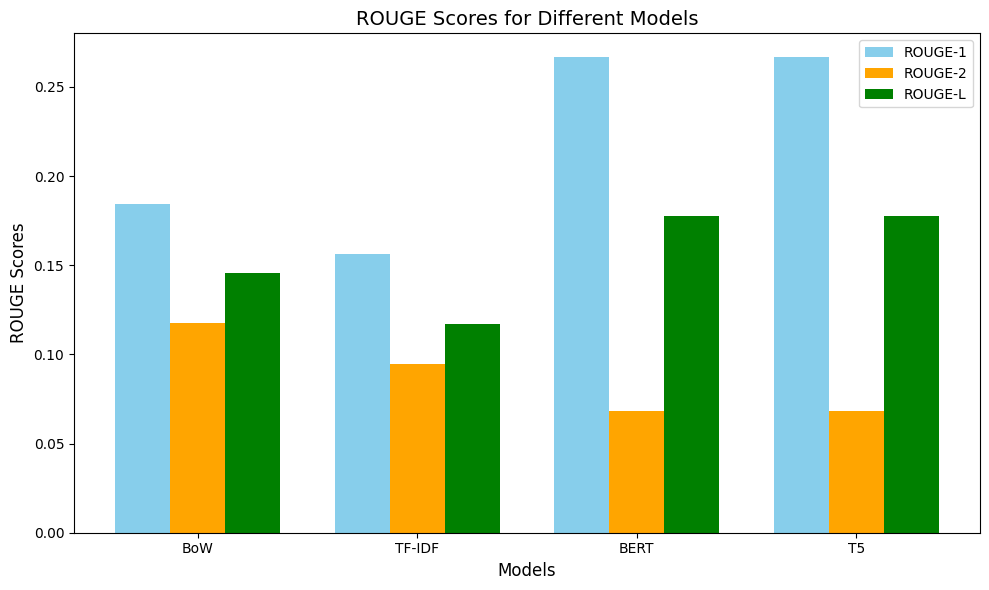

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Call the ROUGE computation functions (replace with your actual function calls)
rouge_scores = {
    "BoW": Calculate_Rouge_Bow(Bow_summary,original_summary),
    "TF-IDF": Calculate_Rouge_TFIDF(TF_IDF_summary,original_summary),
    "BERT": Calculate_Rouge_BERT(BERT_Summary,original_summary),
    "T5": Calculate_Rouge_T5(T5_Summary,original_summary)
}

# Extracting ROUGE scores
models = list(rouge_scores.keys())
rouge1_scores = [rouge_scores[model]["rouge1"].precision for model in models]
rouge2_scores = [rouge_scores[model]["rouge2"].precision for model in models]
rougeL_scores = [rouge_scores[model]["rougeL"].precision for model in models]

# Plotting
x = np.arange(len(models))  # Model indices
width = 0.25  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots
ax.bar(x - width, rouge1_scores, width, label='ROUGE-1', color='skyblue')
ax.bar(x, rouge2_scores, width, label='ROUGE-2', color='orange')
ax.bar(x + width, rougeL_scores, width, label='ROUGE-L', color='green')

# Add labels and title
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('ROUGE Scores', fontsize=12)
ax.set_title('ROUGE Scores for Different Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()